In [98]:
#Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [99]:
#Reading data and printing the first 5 rows.
df = pd.read_csv("Z:Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


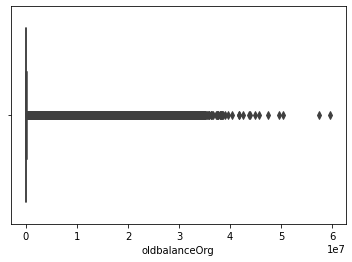

In [101]:
#Visually observing the outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['oldbalanceOrg'])
plt.show()

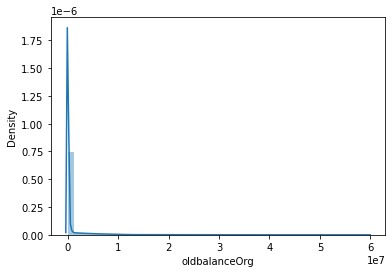

In [102]:
#Visually observing the outliers by plotting histogram.
warnings.filterwarnings('ignore')
sns.distplot(df['oldbalanceOrg'])
plt.show()

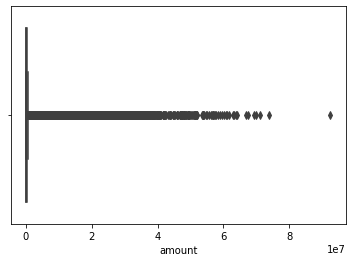

In [103]:
#Visually observing the outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['amount'])
plt.show()

In [104]:
#defining a function that takes in a column of a dataframe and remove the outliers.
def remove_outliers(column):
    upper = df[column].mean() + 3*df[column].std()
    lower = df[column].mean() - 3*df[column].std()
    df[(df[column] > upper) | (df[column] < lower)]
    new_df = df[(df[column] < 8.80) & (df[column] > 5.11)]
    df[column] = np.where(
        df[column]>upper,
        upper,
        np.where(
            df[column]<lower,
            lower,
            df[column]
        )
    )

In [105]:
#Removing the outliers for all the columns with continuous variable.
remove_outliers('amount')
remove_outliers('oldbalanceOrg')
remove_outliers('newbalanceOrig')
remove_outliers('oldbalanceDest')

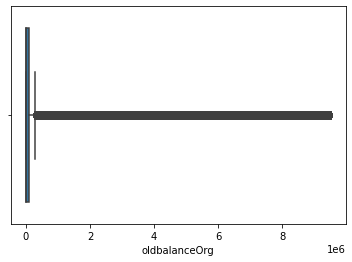

In [106]:
#Visually observing the after treating outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['oldbalanceOrg'])
plt.show()

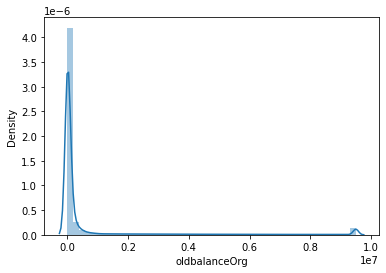

In [107]:
#Visually observing the after treating outliers by plotting histogram.
warnings.filterwarnings('ignore')
sns.distplot(df['oldbalanceOrg'])
plt.show()

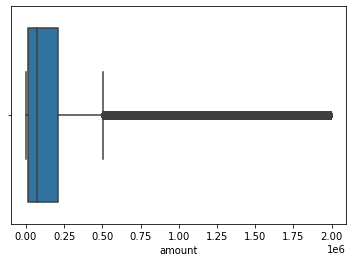

In [108]:
#Visually observing the after treating outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['amount'])
plt.show()

In [109]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [111]:
#Defining a function that takes in the columns of dataframe and label encode it.
def le(col):
    l = preprocessing.LabelEncoder()
    df[col] = l.fit_transform(df[col])

In [112]:
#Label encoding for all the columns with categorical variable.
le('nameOrig')
le('type')
le('nameDest')

In [113]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [114]:
#Defining the dependent and independent variable.
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [115]:
#Splitting the dataset into train(90% of total) and test dataset(10% of total).
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.1)

In [116]:
#Creating the decision tree model
model = tree.DecisionTreeClassifier()
#Training the model using train dataset
model.fit(x_train, y_train)
#Testing the accuracy of the model by feeding in the test dataset.
model.score(x_test, y_test)

0.9996998091980976